In [31]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from specutils import Spectrum1D

In [87]:
#Open the spectra fits file and put it in specutils spectrum1d object
filename = "spec-0548-51986-0020.fits"
with fits.open(filename) as f:
    spec=f[1].data
    header=f[0].header

#convert the log lam and flux to proper units 
lamb=10**spec['loglam'] * u.AA
flux = spec['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
#put the lamb and flux to the 1d specutils object
spectrum= Spectrum1D(spectral_axis=lamb, flux=flux)
#Just convert the required arrays to np arrays
spectrum_wavelenght=np.array(spectrum.spectral_axis)
spectrum_flux=np.array(spectrum.flux)
#make a copy of cleaned spectra for use later
spectrum_flux_clean= np.copy(spectrum_flux)
#make dummy blank sky flux for telescope not pointed at target, this will be used to make blank sky spectra with OH lines
blank_sky_spectra_flux=np.zeros(3828)

In [88]:
#Generate dummy OH lines which are bright
oh_lines_wavelenght=np.array([5500, 5890, 6300, 6364, 6863, 7276 , 7500, 7800, 
                             7900, 8000, 8100, 8200, 8300, 8400])
oh_flux= np.array([100*10**-16, 100*10**-16, 100*10**-16, 100*10**-16, 100*10**-16, 100*10**-16,
                100*10**-16, 100*10**-16, 100*10**-16, 100*10**-16, 100*10**-16, 100*10**-16,
                   100*10**-16, 100*10**-16  ])

In [89]:
#Define a gaussian profile for each line
def gaussian_line(spec_wavelenght, oh_intensity, oh_center, width=2.0):
    return oh_intensity*np.exp(-0.5*((spec_wavelenght - oh_center)/width)**2)
#Loop over each OH line and add the clean spectra with the OH line
for center, intensity in zip(oh_lines_wavelenght, oh_flux):
    #Add OH lines to galaxy spectra
    spectrum_flux+=gaussian_line(spectrum_wavelenght, intensity, center)
    #Add OH lines to blank sky spectra
    blank_sky_spectra_flux+=gaussian_line(spectrum_wavelenght, intensity, center)    

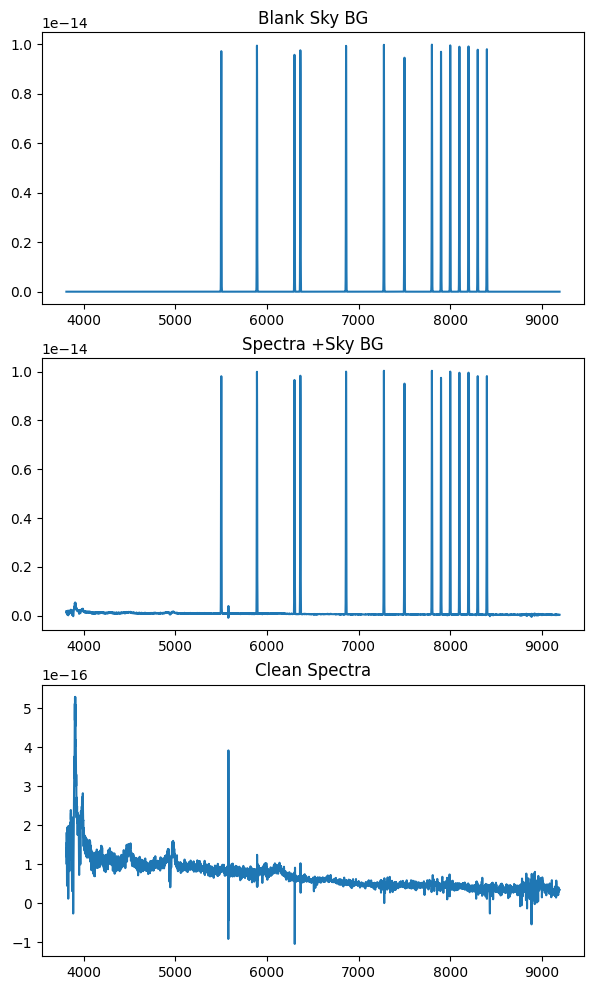

In [90]:
fig,ax=plt.subplots(nrows=3, ncols=1, figsize=(7,12))

ax[0].set_title("Blank Sky BG")
ax[0].plot(spectrum_wavelenght,blank_sky_spectra_flux)
ax[1].set_title("Spectra +Sky BG")
ax[1].plot(spectrum_wavelenght,spectrum_flux)
ax[2].set_title("Clean Spectra")
ax[2].plot(spectrum_wavelenght,spectrum_flux_clean)

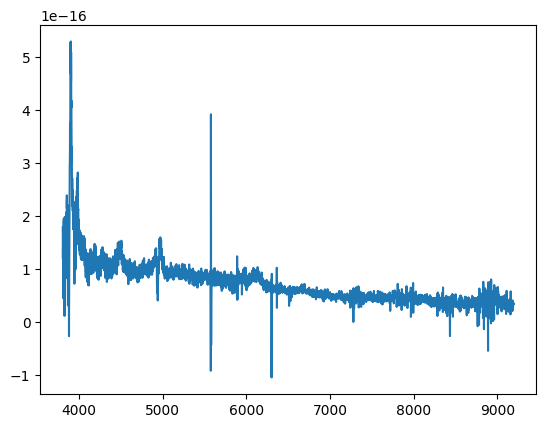

In [93]:
#Subtraction of target spectrum and blank sky spectrum
cleaned_flux=spectrum_flux-blank_sky_spectra_flux
plt.plot(spectrum_wavelenght,cleaned_flux)